In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.metrics import 

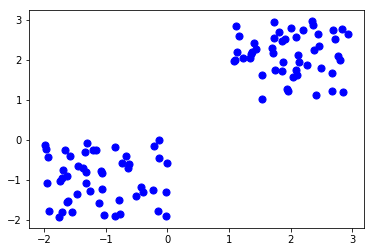

In [129]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [133]:
from sklearn.cluster import KMeans
KMean = KMeans(n_clusters=2)
KMean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [134]:
KMean.cluster_centers_

array([[ 1.9893595 ,  2.1317441 ],
       [-1.09567848, -0.97814705]])

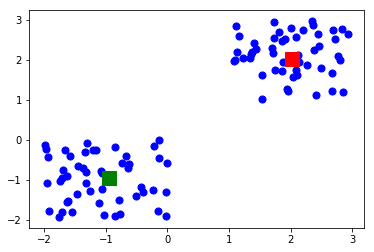

In [135]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

In [136]:
KMean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [143]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
KMean.predict(second_test)

array([1])

In [145]:
import textblob

In [149]:
str1 = '''As you know, I was involved in a collision with a van owned by your insured on Chestnut St. in Waukesha, WI. I was waiting at a stop sign, when the Jenkins Hardware van rear-ended me. I was not injured, but my car suffered a fair amount of damage, which, despite repeated phone calls, Northern Insurance has so far refused to pay for.'''
# str1.apply(lambda x: TextBlob(x).sentiment)
textblob.TextBlob(str1).sentiment

Sentiment(polarity=0.39999999999999997, subjectivity=0.95)

In [154]:
blob = textblob.TextBlob('test1hemant')
blob.detect_language()

'nl'

In [38]:
rng = pd.date_range('2018 Jul 1', periods=10, freq='D')
rng

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10'],
              dtype='datetime64[ns]', freq='D')

In [69]:
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii",
                   parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

data.head()

0_1         2
0 1950-01-01 -0.060310
1 1950-02-01  0.626810
2 1950-03-01 -0.008128
3 1950-04-01  0.555100
4 1950-05-01  0.071577

In [72]:
data.columns = ['month', 'value']
data.index = data.month
data = data.drop('month', 1)
data.head()

value
month               
1950-01-01 -0.060310
1950-02-01  0.626810
1950-03-01 -0.008128
1950-04-01  0.555100
1950-05-01  0.071577

In [77]:
data_pd = data.to_period()

In [80]:
# What if you already have the data frame and want to parse columns?
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

year  month  day  hour
0  2015      2    4     2
1  2016      3    5     3

In [81]:

pd.to_datetime(df)


0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [82]:
pd.to_datetime(df[['year', 'month', 'day']])

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [85]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.head()

2011-01-01 00:00:00   -0.191674
2011-01-01 01:00:00   -0.389763
2011-01-01 02:00:00   -0.407690
2011-01-01 03:00:00   -0.450184
2011-01-01 04:00:00    1.115723
Freq: H, dtype: float64

In [86]:
converted = ts.asfreq('45Min', method='pad')

In [88]:
converted.head()

2011-01-01 00:00:00   -0.191674
2011-01-01 00:45:00   -0.191674
2011-01-01 01:30:00   -0.389763
2011-01-01 02:15:00   -0.407690
2011-01-01 03:00:00   -0.450184
Freq: 45T, dtype: float64

In [89]:
converted = ts.asfreq('90Min', method = 'bfill')
converted.head()

2011-01-01 00:00:00   -0.191674
2011-01-01 01:30:00   -0.407690
2011-01-01 03:00:00   -0.450184
2011-01-01 04:30:00   -1.317541
2011-01-01 06:00:00   -0.393148
Freq: 90T, dtype: float64

In [90]:
ts.resample('D').sum()
ts.head()

2011-01-01 00:00:00   -0.191674
2011-01-01 01:00:00   -0.389763
2011-01-01 02:00:00   -0.407690
2011-01-01 03:00:00   -0.450184
2011-01-01 04:00:00    1.115723
Freq: H, dtype: float64

In [91]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

A         B         C
2016-07-01 00:00:00 -1.362744 -0.338937 -0.325773
2016-07-01 00:00:01 -0.013064 -1.974589  1.381020
2016-07-01 00:00:02 -0.792670 -0.526919  0.007440
2016-07-01 00:00:03 -0.591897 -1.132601 -1.726704
2016-07-01 00:00:04 -0.630140  1.114626 -0.389639

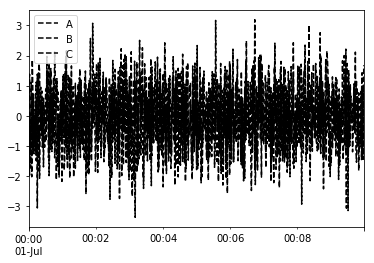

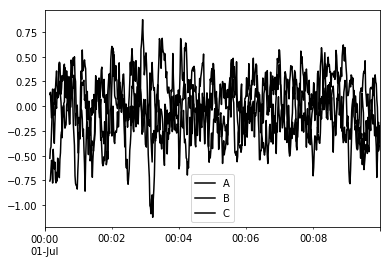

In [98]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [100]:
air_passengers = pd.read_csv("https://raw.githubusercontent.com/rimanshu/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0)
air_passengers.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

In [101]:
air_passengers['1949-01-05':'1949-02-17']

Passengers
Month                 
1949-02-01         118

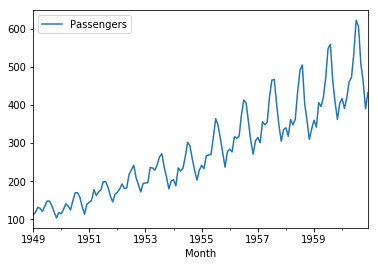

In [102]:
air_passengers.plot()

In [106]:
#air_passengers['1950'].plot(kind='bar')
#air_passengers['1951'].plot(kind='bar')

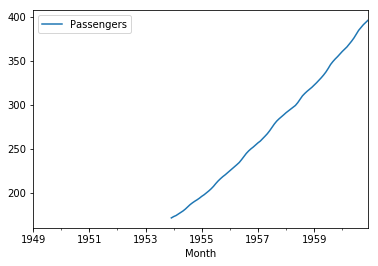

In [109]:
air_passengers.rolling(window = 60).mean().plot()

In [110]:
from statsmodels.tsa.stattools import acf

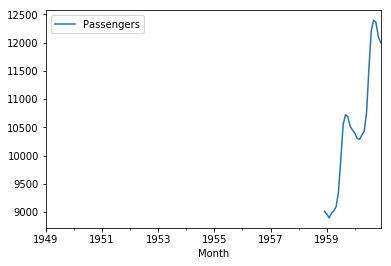

In [111]:
air_passengers.rolling(window = 120).var().plot()

In [112]:
# next more formally apply the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adfuller(air_passengers.Passengers, autolag = 'AIC', regression = 'ct')

(-2.1007818138446717,
 0.5456589343124538,
 13,
 130,
 {'1%': -4.030152423759672,
  '5%': -3.444817634956759,
  '10%': -3.1471816659080565},
 993.2814778200581)

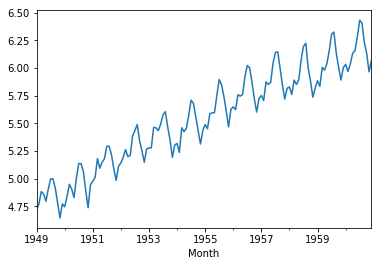

In [113]:
log_passengers = air_passengers.Passengers.apply(lambda x: np.log(x))
log_passengers.plot()

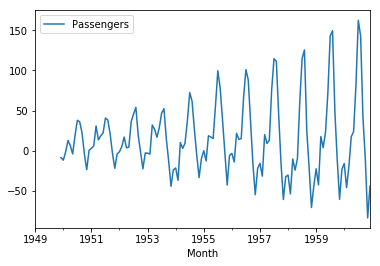

In [115]:
rolling_mean = air_passengers.rolling(window = 12).mean()
passengers_detrended = air_passengers - rolling_mean
passengers_detrended.plot()

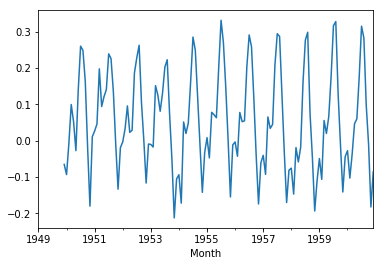

In [116]:

# Exercise: try detrending after taking the log. How does that look?
log_rolling_mean = log_passengers.rolling(window = 12).mean()
log_detrended = log_passengers - log_rolling_mean
log_detrended.plot()


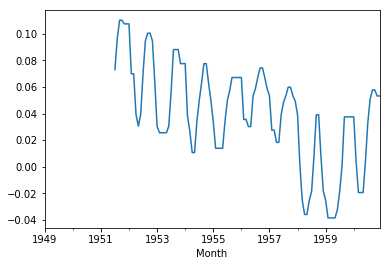

In [117]:
log_detrended.rolling(20).median().plot()


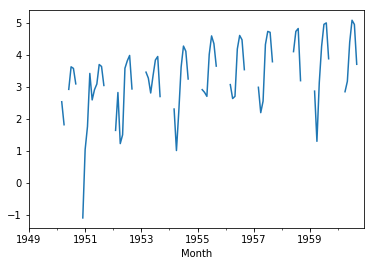

In [118]:
# Exercise: try detrending before taking the log. How does that look?
rolling_mean = air_passengers.rolling(window = 12).mean()
passengers_detrended = air_passengers - rolling_mean
log_detrended2 = passengers_detrended.Passengers.apply(lambda x: np.log(x))
log_detrended2.plot()

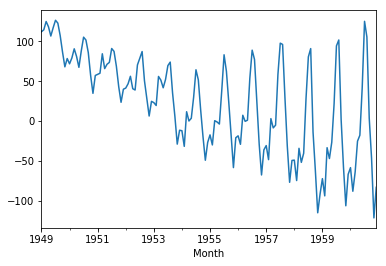

In [119]:
# Now let's use a regression rather than a rolling mean to detrend
from statsmodels.regression.linear_model import OLS
model = OLS(air_passengers.Passengers.values, list(range(len(air_passengers.values))))
result = model.fit()
result.params
fit = pd.Series(result.predict(list(range(len(air_passengers.values)))), index = air_passengers.index)

passengers_detrended = air_passengers.Passengers - fit
passengers_detrended.plot()

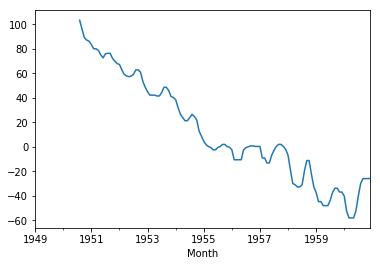

In [120]:
passengers_detrended.rolling(20).median().plot()

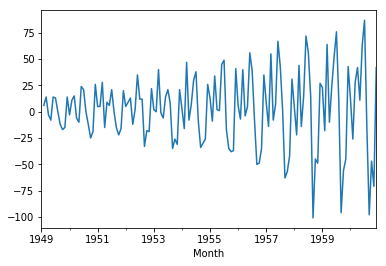

In [121]:

(air_passengers.Passengers - air_passengers.Passengers.shift()).plot()

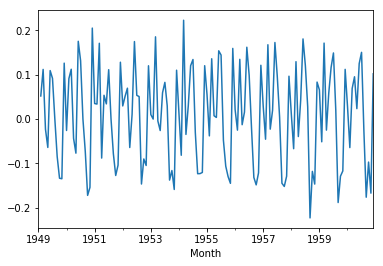

In [122]:
# One common technique is differencing, let's start with log_passengers
log_passengers_diff = log_passengers - log_passengers.shift()
log_passengers_diff.plot()

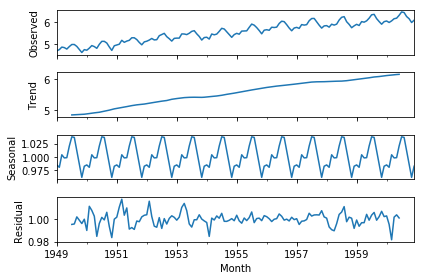

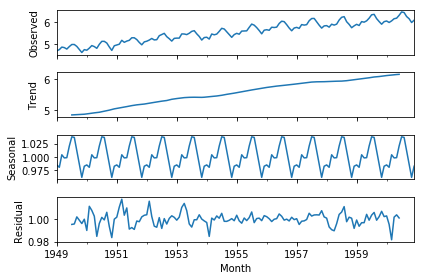

In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose

log_passengers.interpolate(inplace = True)
decomposition = seasonal_decompose(log_passengers, model = 'multiplicative')
decomposition.plot()